In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from tabulate import tabulate
import iexfinance as iex
%matplotlib inline

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df = pd.read_csv("trump_tweets.csv") 
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,LOUISIANA — Tomorrow you will head to the poll...,10/12/2019 3:49,9706,35425,False,1.182870e+18
1,Twitter for iPhone,Louisiana REPUBLICANS thank you for a great ev...,10/12/2019 3:48,10626,40844,False,1.182870e+18
2,Twitter for iPhone,“I never saw so many subpoenas!” @ShannonBream...,10/12/2019 3:25,15523,56841,False,1.182860e+18
3,Twitter for iPhone,So funny to watch Steve Kerr grovel and pander...,10/12/2019 3:25,20293,99524,False,1.182860e+18
4,Twitter for iPhone,WHERE’S HUNTER?,10/12/2019 2:58,26280,110222,False,1.182850e+18


In [2]:
df["Sentiment"] = df.apply(lambda x : analyzer.polarity_scores(x['text']), axis=1)
df['Negative'] =df['Sentiment'].apply(lambda x : x.get('neg') )
df['Neutral'] =df['Sentiment'].apply(lambda x : x.get('neu') )
df['Postive'] =df['Sentiment'].apply(lambda x : x.get('pos') )
df['Compound'] =df['Sentiment'].apply(lambda x : x.get('compound') )
df = df.drop(columns=["Sentiment","source","id_str"],axis=1)
df['created_at'] = pd.to_datetime(df['created_at'])
df = df.rename(columns={'created_at': 'date'})
df


,text,date,retweet_count,favorite_count,is_retweet,Negative,Neutral,Postive,Compound
0,LOUISIANA — Tomorrow you will head to the poll...,2019-10-12 03:49:00,9706,35425,False,0.000,0.876,0.124,0.6892
1,Louisiana REPUBLICANS thank you for a great ev...,2019-10-12 03:48:00,10626,40844,False,0.057,0.691,0.252,0.8945
2,“I never saw so many subpoenas!” @ShannonBream...,2019-10-12 03:25:00,15523,56841,False,0.299,0.701,0.000,-0.9284
3,So funny to watch Steve Kerr grovel and pander...,2019-10-12 03:25:00,20293,99524,False,0.189,0.687,0.123,-0.5266
4,WHERE’S HUNTER?,2019-10-12 02:58:00,26280,110222,False,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...
15248,Well the year has officially begun. I have man...,2016-01-01 23:00:00,2642,8495,False,0.104,0.693,0.203,0.6325
15249,@sprinklermanus: @CNN @realDonaldTrump they're...,2016-01-01 21:29:00,933,3330,False,0.000,0.729,0.271,0.7351
15250,@jallenaip: Hillary said she was in a Fog of W...,2016-01-01 06:08:00,2721,7490,False,0.304,0.696,0.000,-0.8478
15251,Happy New Year from #MarALago! Thank you to my...,2016-01-01 06:07:00,1948,8258,False,0.000,0.494,0.506,0.9230


In [3]:
#df.to_csv('trump_tweeets_with_sentiment.csv')

In [10]:
df_nort = df[~df['text'].str.contains("RT @")]
df_china = df_nort[df_nort['text'].str.contains("China")]
#df_china = df[~df['text'].str.contains("RT@")]
df_china = df_china[(df_china['Compound'] < -0.5) | (df_china['Compound'] > 0.5)]
df_china
#df['two'].between(-0.5, 0.5, inclusive=False)
#df = df[(df['closing_price'] >= 99) & (df['closing_price'] <= 101)]

,text,date,retweet_count,favorite_count,is_retweet,Negative,Neutral,Postive,Compound
3,So funny to watch Steve Kerr grovel and pander...,2019-10-12 03:25:00,20293,99524,False,0.189,0.687,0.123,-0.5266
56,One of the great things about the China Deal i...,2019-10-11 14:15:00,16229,74923,False,0.000,0.819,0.181,0.8805
58,Good things are happening at China Trade Talk ...,2019-10-11 13:49:00,17162,85617,False,0.000,0.708,0.292,0.8952
199,I was elected on getting out of these ridiculo...,2019-10-07 15:20:00,21267,87908,False,0.146,0.635,0.219,0.6815
213,.@60Minutes “forgot” to report that we are hel...,2019-10-06 23:54:00,20112,71366,False,0.000,0.833,0.167,0.8553
...,...,...,...,...,...,...,...,...,...
13110,The @USCHAMBER must fight harder for the Ameri...,2016-06-29 13:09:00,4326,13405,False,0.206,0.722,0.072,-0.5719
13464,Crooked Hillary has zero imagination and even ...,2016-05-20 09:47:00,4779,14610,False,0.000,0.766,0.234,0.7506
13522,The pathetic new hit ad against me misrepresen...,2016-05-17 11:37:00,4945,14003,False,0.148,0.852,0.000,-0.6114
13610,@mathewjmari: On @FaceTheNation #MattSchlapp w...,2016-05-08 05:57:00,3832,12733,False,0.025,0.841,0.134,0.9696


In [11]:
import plotly.express as px
import plotly.graph_objects as go


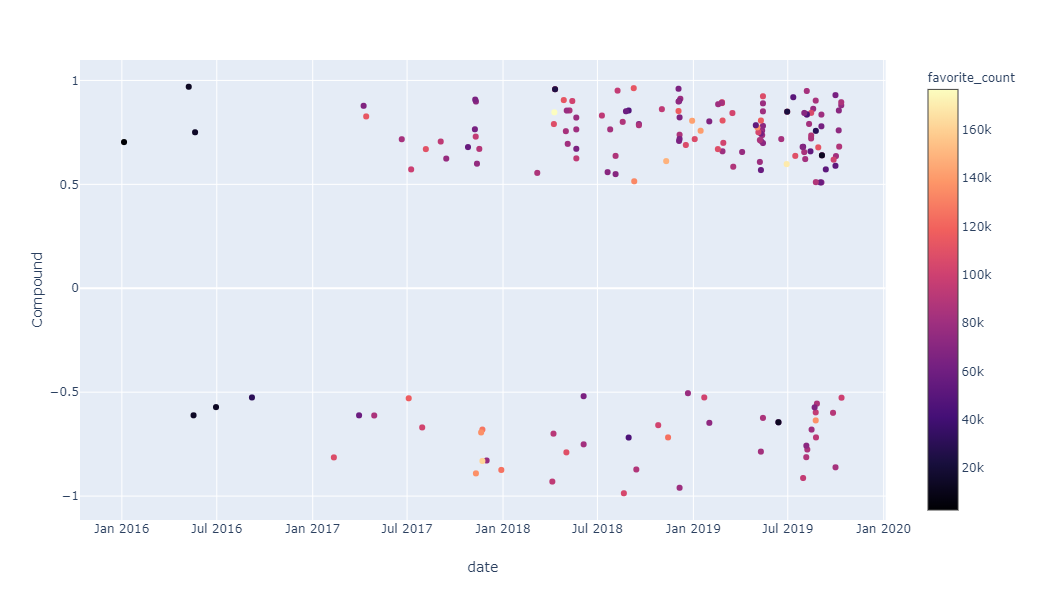

In [12]:
fig = px.scatter(df_china, x="date", 
                 y="Compound",
                 color="favorite_count", 
                 color_continuous_scale='Magma',
                 hover_data=["text"])
fig.show()


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



(array([735964., 736146., 736330., 736511., 736695., 736876., 737060.,
        737241., 737425.]), <a list of 9 Text xticklabel objects>)

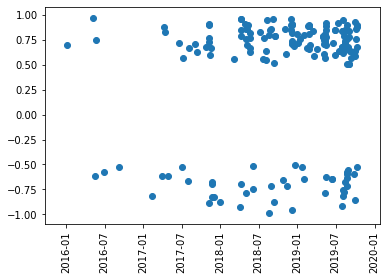

In [13]:

plt.scatter(df_china['date'], df_china['Compound'])
plt.xticks(rotation='vertical')

In [14]:
from iexfinance.refdata import get_symbols
from iexfinance.stocks import get_historical_data
tickers=pd.DataFrame(get_symbols())
tickers.head()

IEXAuthenticationError: The IEX Cloud API key must be provided either through the token variable or through the environmental variable IEX_TOKEN.

In [15]:
tickers = ["SPY"]
end_date = '2019-10-12'
start_date = '2016-01-01'

# Get 1 year's worth of historical data for AAPL
df_spy = get_historical_data(tickers, start_date, end_date,  output_format='pandas')
#df_spy.drop(columns=['open', 'high', 'low', 'volume'], level=0, inplace=True)
df_spy = df_spy.reset_index()
df_spy.shape

IEXAuthenticationError: The IEX Cloud API key must be provided either through the token variable or through the environmental variable IEX_TOKEN.

In [74]:
df_spy

,date,open,high,low,close,volume
0,2016-01-04,200.49,201.03,198.59,201.02,222353534
1,2016-01-05,201.40,201.90,200.05,201.36,110845849
2,2016-01-06,198.34,200.06,197.60,198.82,152112604
3,2016-01-07,195.33,197.44,193.59,194.05,213436073
4,2016-01-08,195.19,195.85,191.58,191.92,209817228
...,...,...,...,...,...,...
946,2019-10-07,293.47,295.26,292.77,293.08,60656561
947,2019-10-08,291.04,291.85,288.49,288.53,101575470
948,2019-10-09,290.75,292.30,288.66,291.27,65707329
949,2019-10-10,291.18,294.21,291.00,293.24,57255974


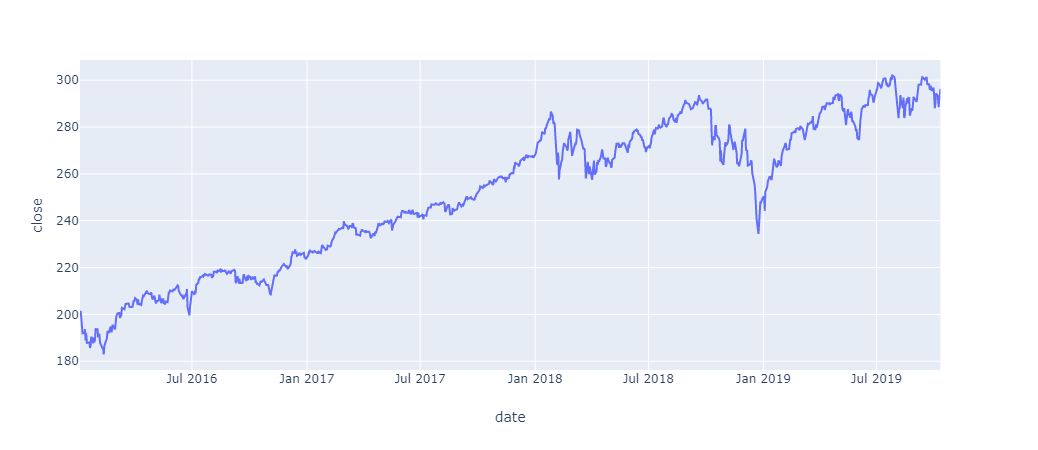

In [75]:
fig2 = px.line(df_spy, x="date", y="close")
fig2.show()

(array([735964., 736146., 736330., 736511., 736695., 736876., 737060.,
        737241.]), <a list of 8 Text xticklabel objects>)

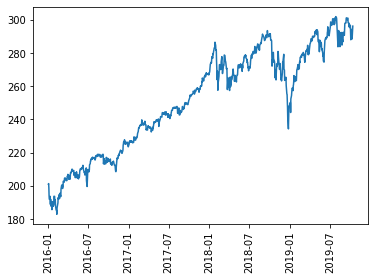

In [76]:
plt.plot(df_spy['date'], df_spy['close'])
plt.xticks(rotation='vertical')

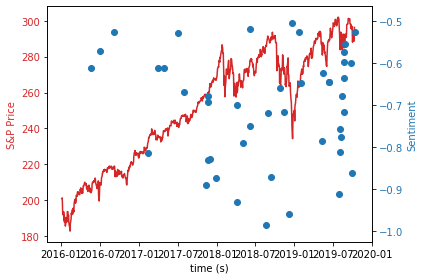

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data


fig, ax1 = plt.subplots()

color2 = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('S&P Price', color=color2)
ax1.plot(df_spy['date'], df_spy['close'], color=color2)
ax1.tick_params(axis='y', labelcolor=color2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Sentiment', color=color)  # we already handled the x-label with ax1
ax2.scatter(df_china['date'], df_china['Compound'])
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()